In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
classes = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
X_train.shape

(60000, 28, 28)

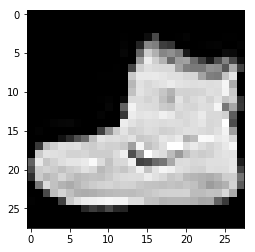

In [6]:
plt.gray()
plt.imshow(X_train[0])

In [7]:
y_train[0]

9

In [8]:
classes[y_train[0]]

'Ankle boot'

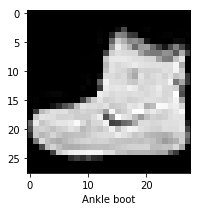

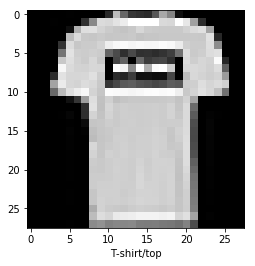

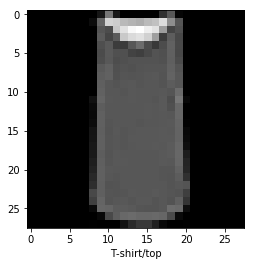

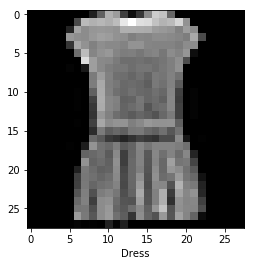

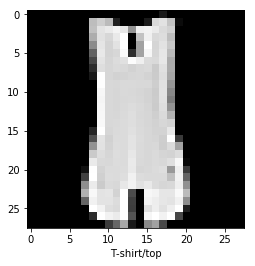

In [9]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(X_train[i])
    plt.xlabel(classes[y_train[i]])
    plt.show()

In [10]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [11]:
28*28

784

In [35]:
def get_model(hidden_layers = 1):
    #flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28,28))]
    
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    
    layers.append(keras.layers.Dense(10, activation = 'sigmoid'))
    
    model = keras.Sequential(layers)
    
    model.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model
    

In [36]:
model = get_model(1)
model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4740 - accuracy: 0.8315
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3605 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3228 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2987 - accuracy: 0.8891
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2802 - accuracy: 0.8954


In [37]:
classes[np.argmax(model.predict(X_test_scaled)[8])]

'Sandal'

In [38]:
classes[y_test[8]]

'Sandal'

In [39]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [40]:
%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(1)
    cpu_model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4757 - accuracy: 0.8303
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3606 - accuracy: 0.8675
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3237 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2998 - accuracy: 0.8886
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2814 - accuracy: 0.8959


In [41]:
%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(1)
    gpu_model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4747 - accuracy: 0.8311
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3601 - accuracy: 0.8683
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3246 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3007 - accuracy: 0.8890
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2808 - accuracy: 0.8955


In [42]:
%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(5)
    cpu_model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 31s 15ms/step - loss: 0.5141 - accuracy: 0.8150
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3895 - accuracy: 0.8591
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3493 - accuracy: 0.8743
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3234 - accuracy: 0.8824
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3095 - accuracy: 0.8886


In [43]:
%timeit -n1 -r1
with tf.device('GPU:0'):
    gpu_model = get_model(5)
    gpu_model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 30s 15ms/step - loss: 0.5127 - accuracy: 0.8155
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3946 - accuracy: 0.8585
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3496 - accuracy: 0.8743
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3287 - accuracy: 0.8818
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3111 - accuracy: 0.8870
